# Mental Health Detection 🧠 via Multiclass Emotion Classification 🤖 of Social Media Posts  🔗

📝 Project Overview:  
This project focuses on detecting mental health indicators by classifying the emotions expressed in social media posts. It leverages Natural Language Processing (NLP) and Machine Learning techniques to build an end-to-end multiclass emotion classification system. The dataset used contains labeled tweets, and the project includes all major stages — data preprocessing, feature extraction (TF-IDF), model implementation, evaluation, testing on unseen data, and final deployment through Gradio.

Mount Google Drive & Define Paths

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = "/content/drive/MyDrive/HireBridge NLP + ML Project - Multiclass Emotion Classification/Tweets Emotion Detection Dataset"

train_path = f"{base_path}/train.txt"
test_path = f"{base_path}/test.txt"
val_path = f"{base_path}/val.txt"

## FOR LOCAL FOLDER USAGE !!


In [ ]:
# Define the base path to your local dataset folder
#base_path = "Tweets Emotion Detection Dataset"

#train_path = f"{base_path}/train.txt"
#test_path = f"{base_path}/test.txt"
#val_path = f"{base_path}/val.txt"

Importing Libraries

In [6]:
#Data Handling & Preprocessing
import pandas as pd
import numpy as np
import re
import string

In [54]:
import warnings
warnings.filterwarnings("ignore")

# MODULE 1: LOADING AND CLEANING THE DATASET

Load and Clean the Data

In [55]:
def load_dataset(path):
    texts = []
    labels = []

    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:  # Avoid processing empty lines
                parts = line.split(';', 1)  # Split only on the first occurrence of ';'
                if len(parts) == 2:
                    texts.append(parts[0])
                    labels.append(parts[1])

    return texts, labels

train_texts, train_labels = load_dataset(train_path)
test_texts, test_labels = load_dataset(test_path)
val_texts, val_labels = load_dataset(val_path)

Quick Peek into Data

In [56]:
print("Train Samples:", len(train_texts))
print("Sample Text:", train_texts[0])
print("Sample Label:", train_labels[0])

Train Samples: 16000
Sample Text: i didnt feel humiliated
Sample Label: sadness


# MODULE 1.1: PREPROCESSING

In [57]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words]  # Remove stopwords + stemming
    return " ".join(filtered)

#Applying

train_texts_cleaned = [preprocess_text(t) for t in train_texts]
test_texts_cleaned = [preprocess_text(t) for t in test_texts]
val_texts_cleaned = [preprocess_text(t) for t in val_texts]

# MODULE 2: TF-IDF VECTORIZATION

Vectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# Fit only on training data
X_train = vectorizer.fit_transform(train_texts_cleaned)

# Transform validation and test data
X_val = vectorizer.transform(val_texts_cleaned)
X_test = vectorizer.transform(test_texts_cleaned)

#Check
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (16000, 5000)
Validation shape: (2000, 5000)
Test shape: (2000, 5000)


LabelEncoder

In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_val = label_encoder.transform(val_labels)
y_test = label_encoder.transform(test_labels)

#Check
print("Encoded Labels:", set(y_train))
print("Number of Classes:", len(set(y_train)))

Encoded Labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)}
Number of Classes: 6


In [61]:
print(X_train[0])  # This will show a sparse matrix row (not readable, but confirms data exists)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 5000)>
  Coords	Values
  (0, 1101)	0.6001134654305744
  (0, 1562)	0.1188164796609834
  (0, 2103)	0.7910413849918839


# MODULE 3: MODEL IMPLEMENTATION

Train and evaluate Logistic Regression, Naive Bayes, and SVM models using vectorized input.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

**1. Logistic Regression:**

In [63]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

log_val_preds = log_reg.predict(X_val)
log_test_preds = log_reg.predict(X_test)

In [64]:
print("\n--- Logistic Regression ---")
print("Validation Accuracy:", accuracy_score(y_val, log_val_preds))
print("Test Accuracy:", accuracy_score(y_test, log_test_preds))
print("Validation F1 Score:", f1_score(y_val, log_val_preds, average='weighted'))
print("Test F1 Score:", f1_score(y_test, log_test_preds, average='weighted'))


--- Logistic Regression ---
Validation Accuracy: 0.8425
Test Accuracy: 0.845
Validation F1 Score: 0.8388940962818441
Test F1 Score: 0.8398049484998672


**2. Naive Bayes:**

In [65]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_val_preds = nb.predict(X_val)
nb_test_preds = nb.predict(X_test)

In [66]:
print("\n--- Naive Bayes ---")
print("Validation Accuracy:", accuracy_score(y_val, nb_val_preds))
print("Test Accuracy:", accuracy_score(y_test, nb_test_preds))
print("Validation F1 Score:", f1_score(y_val, nb_val_preds, average='weighted'))
print("Test F1 Score:", f1_score(y_test, nb_test_preds, average='weighted'))


--- Naive Bayes ---
Validation Accuracy: 0.719
Test Accuracy: 0.7275
Validation F1 Score: 0.6728714723627546
Test F1 Score: 0.6838981078282836


**3. SVM (LinearSVC):**

In [67]:
svm = LinearSVC()
svm.fit(X_train, y_train)

svm_val_preds = svm.predict(X_val)
svm_test_preds = svm.predict(X_test)

In [68]:
print("\n--- SVM (LinearSVC) ---")
print("Validation Accuracy:", accuracy_score(y_val, svm_val_preds))
print("Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print("Validation F1 Score:", f1_score(y_val, svm_val_preds, average='weighted'))
print("Test F1 Score:", f1_score(y_test, svm_test_preds, average='weighted'))


--- SVM (LinearSVC) ---
Validation Accuracy: 0.8665
Test Accuracy: 0.8565
Validation F1 Score: 0.8656287819290077
Test F1 Score: 0.8554401015182367


# MODEL:4 Exploratory Data Analysis (EDA) visualization

'involves using various charts, graphs, and plots to understand data patterns, trends, and relationships.'

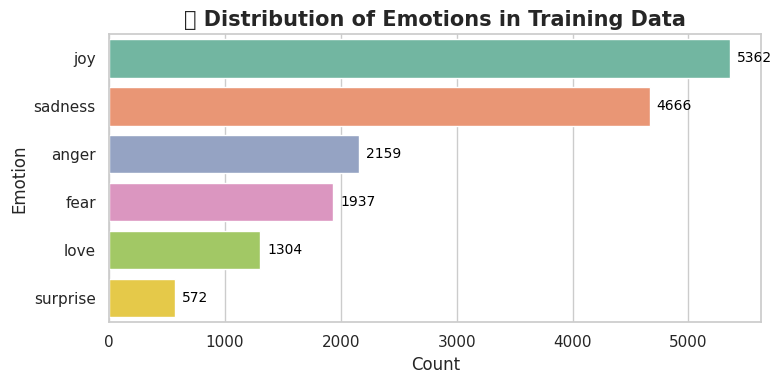

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 4))
bar_plot = sns.countplot(y=train_labels,
                         order=pd.value_counts(train_labels).index,
                         palette='Set2')

# Add count labels to each bar
for p in bar_plot.patches:
    count = int(p.get_width())
    bar_plot.annotate(f'{count}',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=10,
                      color='black', xytext=(5, 0), textcoords='offset points')

# Plot titles and labels
plt.title('🧠 Distribution of Emotions in Training Data', fontsize=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

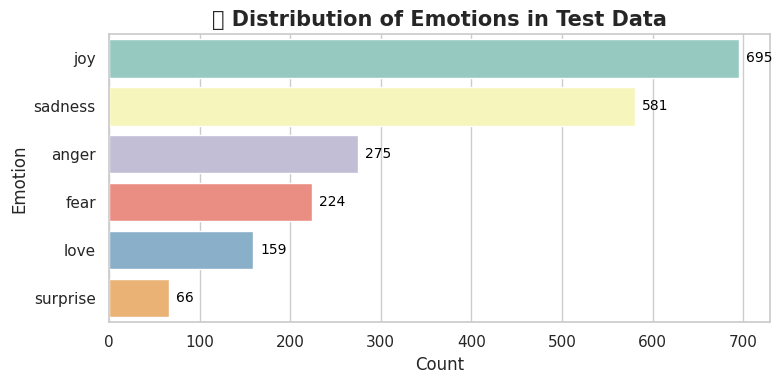

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(8, 4))
bar_plot = sns.countplot(
    y=test_labels,
    order=pd.value_counts(test_labels).index,
    palette='Set3'  # You can also try 'Set2', 'Pastel1', or a custom list
)

# Annotate counts on bars
for p in bar_plot.patches:
    count = int(p.get_width())
    bar_plot.annotate(f'{count}',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left', va='center', fontsize=10,
                      color='black', xytext=(5, 0),
                      textcoords='offset points')

# Formatting
plt.title('📊 Distribution of Emotions in Test Data', fontsize=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

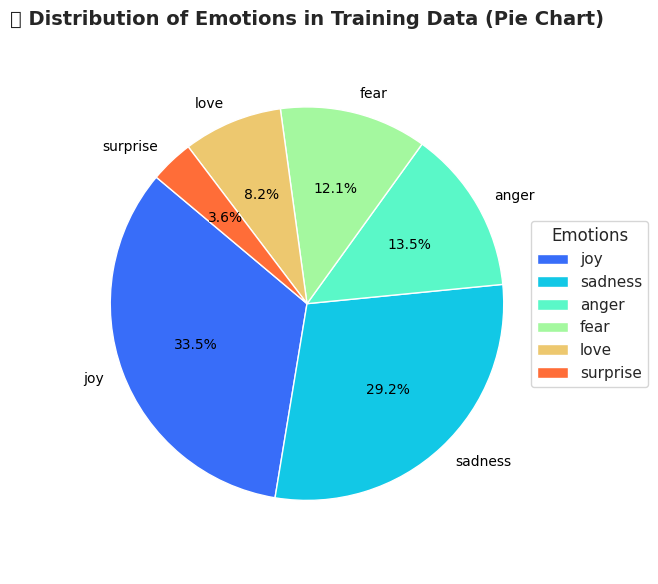

In [72]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get label counts
label_counts = pd.Series(train_labels).value_counts()

# Define color palette
colors = sns.color_palette('rainbow', len(label_counts))

# Create pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)

# Styling the title and layout
plt.title('🎯 Distribution of Emotions in Training Data (Pie Chart)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Keep the pie chart circular
plt.legend(wedges, label_counts.index, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


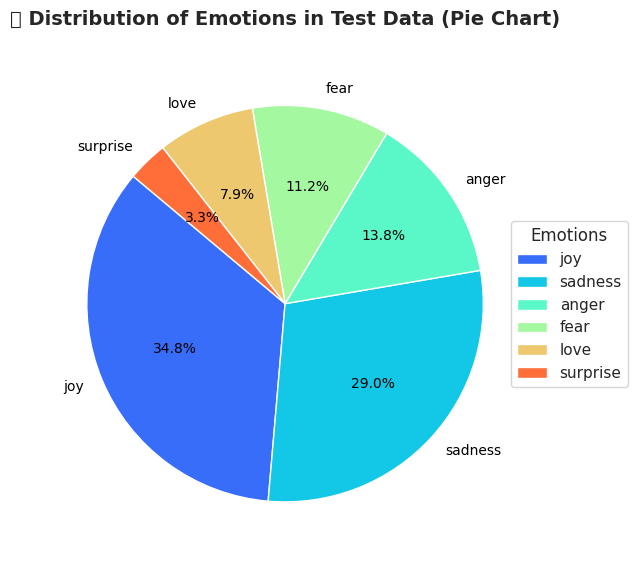

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count emotion labels in test data
label_counts_test = pd.Series(test_labels).value_counts()

# Define color palette
colors = sns.color_palette('rainbow', len(label_counts_test))

# Create pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    label_counts_test,
    labels=label_counts_test.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)

# Add title and style
plt.title('📊 Distribution of Emotions in Test Data (Pie Chart)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Makes pie chart a perfect circle

# Add a legend outside the plot
plt.legend(wedges, label_counts_test.index, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

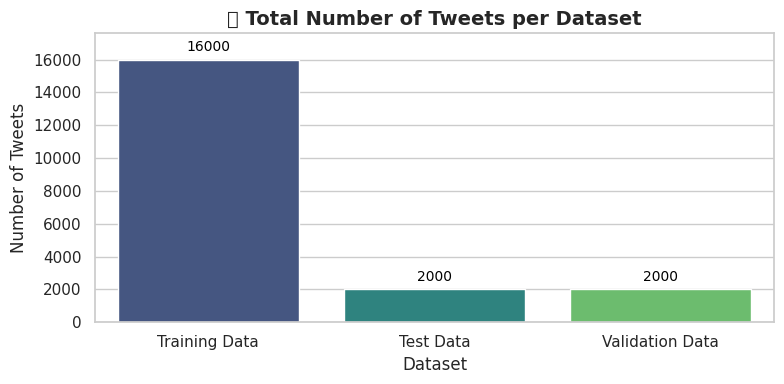

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
dataset_names = ['Training Data', 'Test Data', 'Validation Data']
dataset_counts = [len(train_texts), len(test_texts), len(val_texts)]

# Set Seaborn style
sns.set(style="whitegrid")

# Create plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=dataset_names, y=dataset_counts, palette='viridis')

# Add value labels on bars
for i, count in enumerate(dataset_counts):
    bar_plot.text(i, count + max(dataset_counts) * 0.02, str(count),
                  ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
plt.title('📦 Total Number of Tweets per Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Dataset')
plt.ylabel('Number of Tweets')
plt.ylim(0, max(dataset_counts) * 1.1)  # Add some headroom for labels
plt.tight_layout()
plt.show()


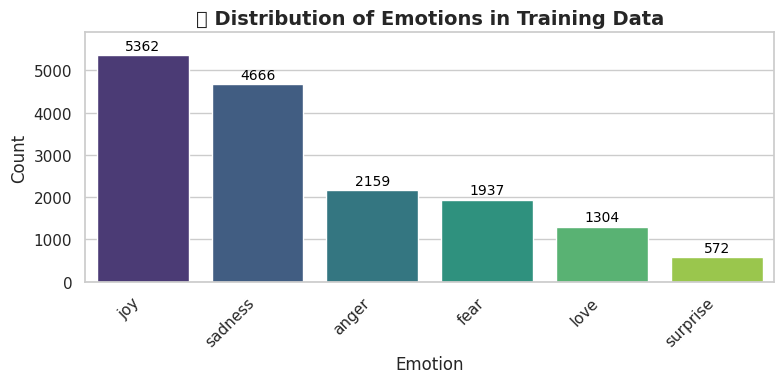

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count each label
label_counts = pd.Series(train_labels).value_counts()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Add count labels on top of each bar
for i, count in enumerate(label_counts.values):
    bar_plot.text(i, count + max(label_counts.values)*0.01, str(count),
                  ha='center', va='bottom', fontsize=10, color='black')

# Customize axes and title
plt.title('📊 Distribution of Emotions in Training Data', fontsize=14, fontweight='bold')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(label_counts.values) * 1.1)  # Add space for labels

# Layout adjustment
plt.tight_layout()
plt.show()

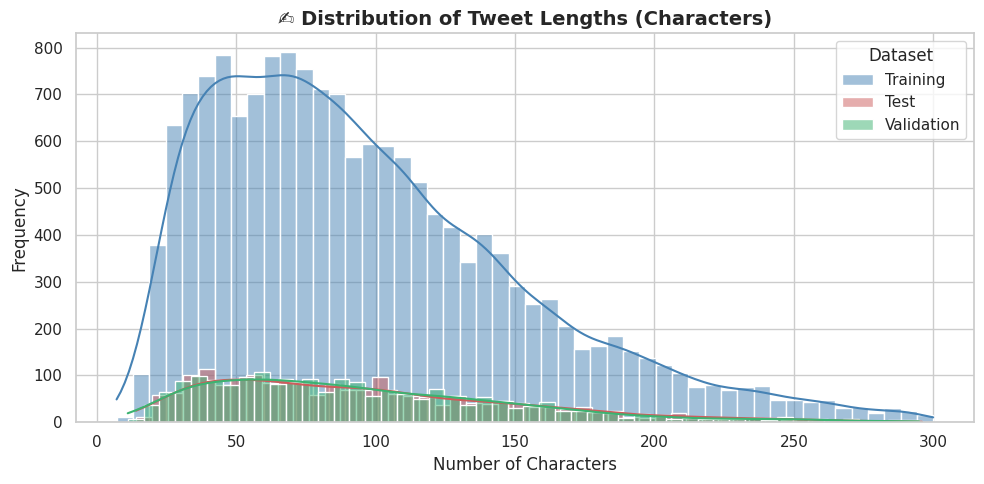

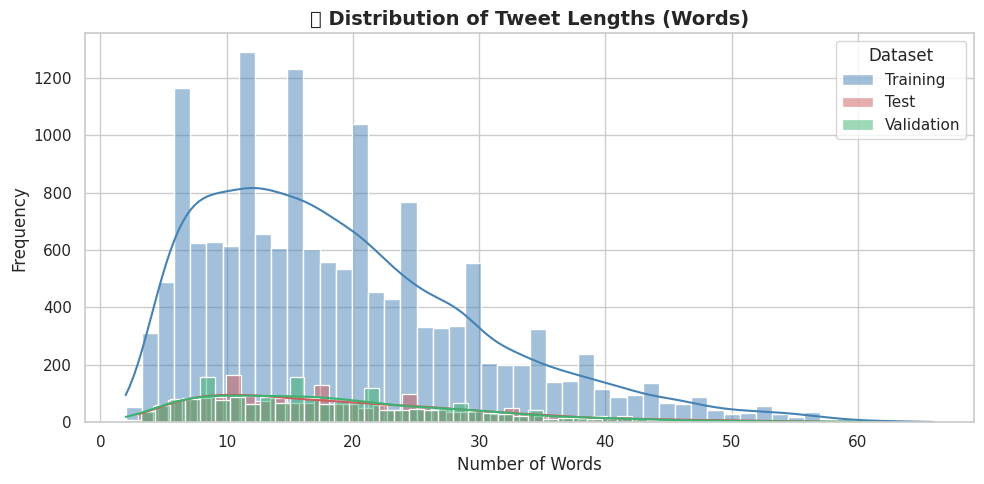

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate tweet lengths in characters
train_char_lengths = [len(text) for text in train_texts]
test_char_lengths = [len(text) for text in test_texts]
val_char_lengths = [len(text) for text in val_texts]

# Calculate tweet lengths in words
train_word_lengths = [len(text.split()) for text in train_texts]
test_word_lengths = [len(text.split()) for text in test_texts]
val_word_lengths = [len(text.split()) for text in val_texts]

# Set Seaborn style
sns.set(style="whitegrid")

# Histogram of character lengths
plt.figure(figsize=(10, 5))
sns.histplot(train_char_lengths, bins=50, kde=True, color='steelblue', label='Training')
sns.histplot(test_char_lengths, bins=50, kde=True, color='indianred', label='Test')
sns.histplot(val_char_lengths, bins=50, kde=True, color='mediumseagreen', label='Validation')
plt.title('✍️ Distribution of Tweet Lengths (Characters)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Histogram of word lengths
plt.figure(figsize=(10, 5))
sns.histplot(train_word_lengths, bins=50, kde=True, color='steelblue', label='Training')
sns.histplot(test_word_lengths, bins=50, kde=True, color='indianred', label='Test')
sns.histplot(val_word_lengths, bins=50, kde=True, color='mediumseagreen', label='Validation')
plt.title('📝 Distribution of Tweet Lengths (Words)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


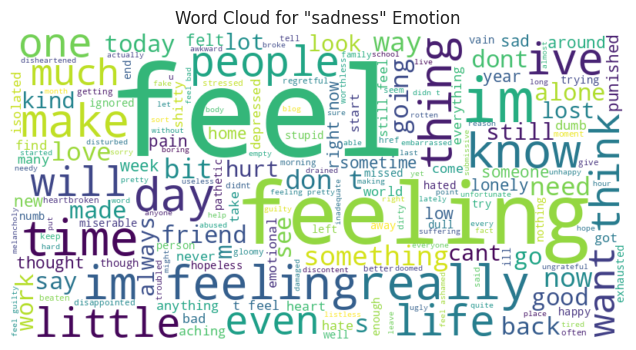

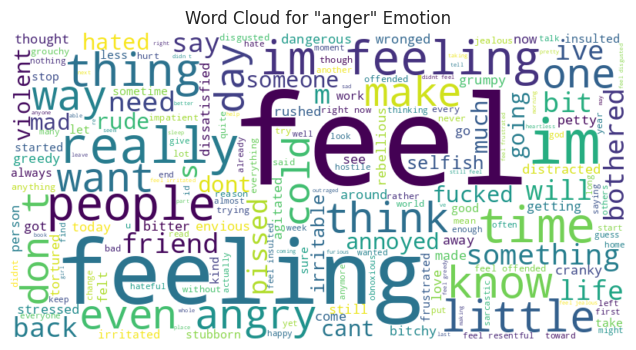

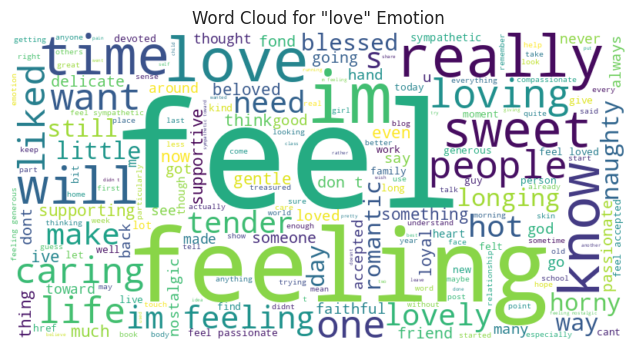

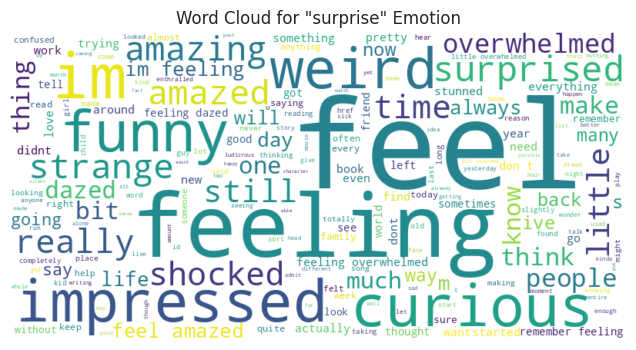

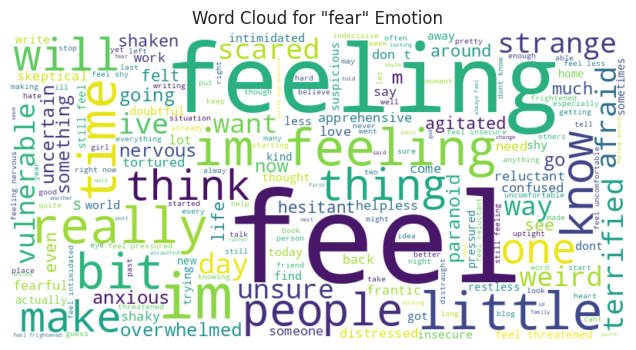

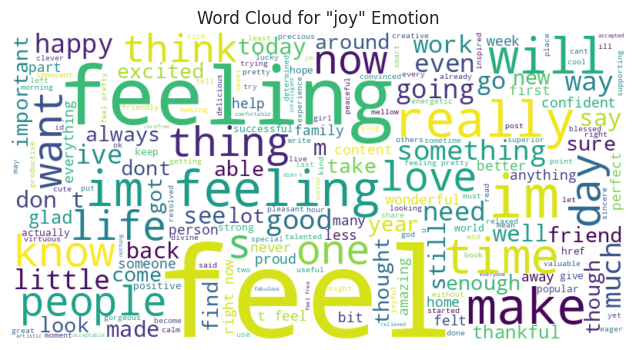

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Combine texts and labels into a DataFrame for easier handling
all_data = pd.DataFrame({'text': train_texts + test_texts + val_texts,
                           'label': train_labels + test_labels + val_labels})

# Get unique emotions
emotions = all_data['label'].unique()

# Generate and display word cloud for each emotion
for emotion in emotions:
    # Filter texts for the current emotion
    emotion_texts = all_data[all_data['label'] == emotion]['text']
    # Combine all texts for this emotion into a single string
    combined_text = " ".join(emotion_texts)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for "{emotion}" Emotion')
    plt.show()

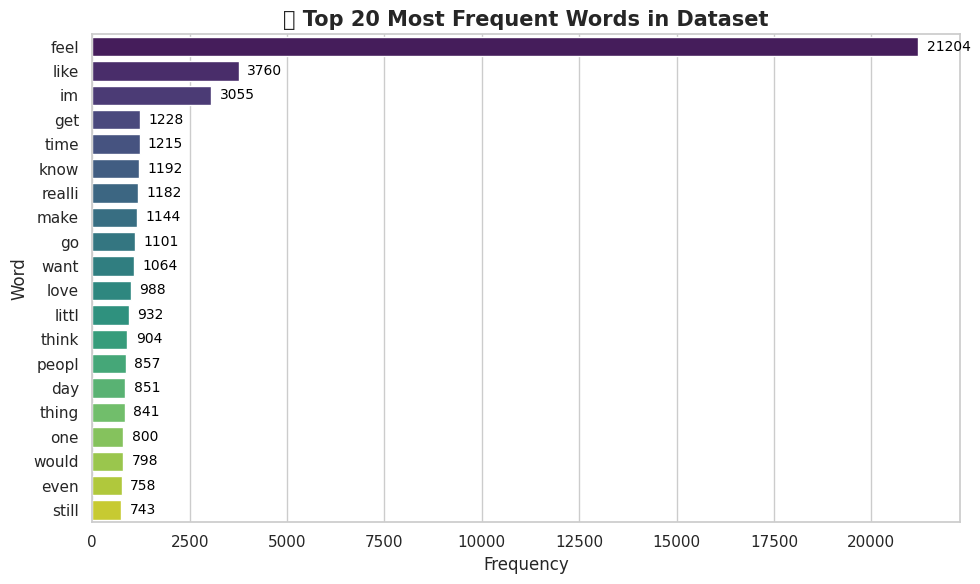

In [78]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all cleaned texts
all_cleaned_texts = train_texts_cleaned + test_texts_cleaned + val_texts_cleaned

# Split into words and flatten the list
all_words = " ".join(all_cleaned_texts).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Separate words and counts for plotting
words = [word for word, count in top_20_words]
counts = [count for word, count in top_20_words]

# Set Seaborn style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=counts, y=words, palette='viridis')

# Add value labels to bars
for i, count in enumerate(counts):
    bar_plot.text(count + max(counts) * 0.01, i, str(count), va='center', fontsize=10, color='black')

# Formatting
plt.title('🔠 Top 20 Most Frequent Words in Dataset', fontsize=15, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


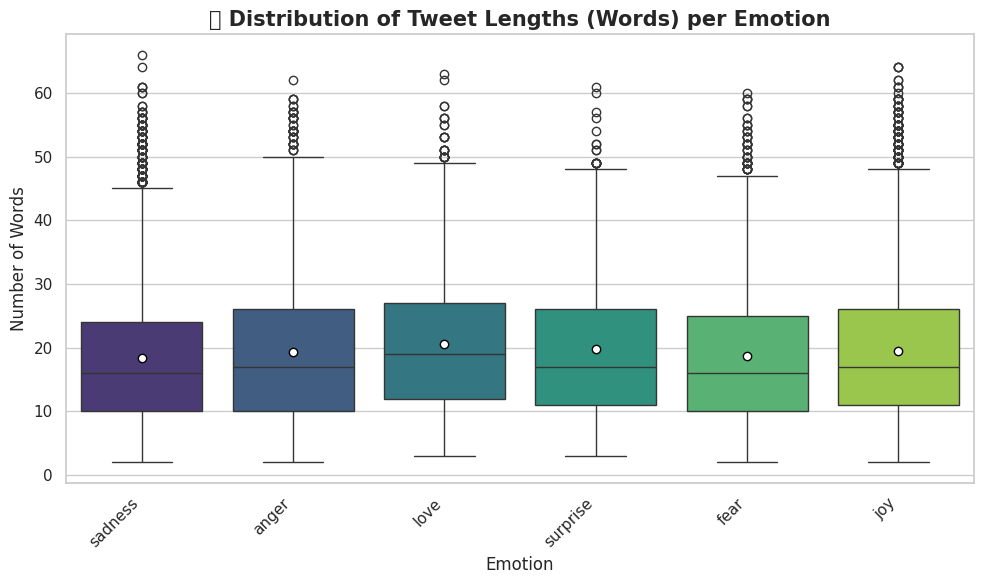

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine texts and labels into a single DataFrame
all_data = pd.DataFrame({
    'text': train_texts + test_texts + val_texts,
    'label': train_labels + test_labels + val_labels
})

# Calculate tweet lengths in words
all_data['word_count'] = all_data['text'].apply(lambda x: len(x.split()))

# Set Seaborn style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='label',
    y='word_count',
    data=all_data,
    palette='viridis',
    showfliers=True,  # Set to False to hide outliers
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 6
    }
)

# Enhancements
plt.title('📝 Distribution of Tweet Lengths (Words) per Emotion', fontsize=15, fontweight='bold')
plt.xlabel('Emotion')
plt.ylabel('Number of Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


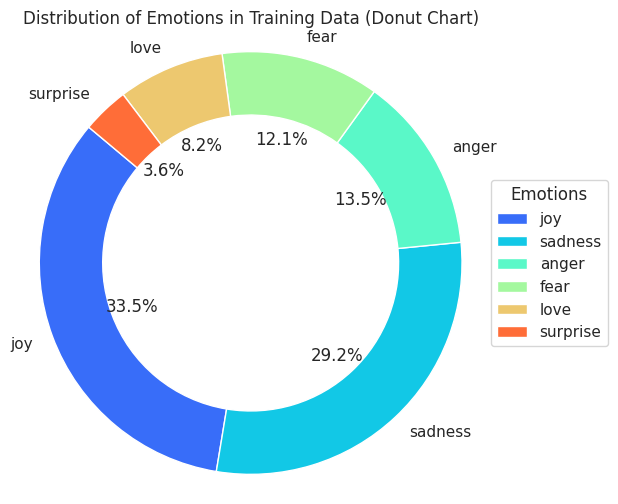

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

label_counts = pd.Series(train_labels).value_counts()

plt.figure(figsize=(6, 6))
# Create a circle for the center of the plot
circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('rainbow', len(label_counts)), wedgeprops=dict(width=0.3))
plt.title('Distribution of Emotions in Training Data (Donut Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

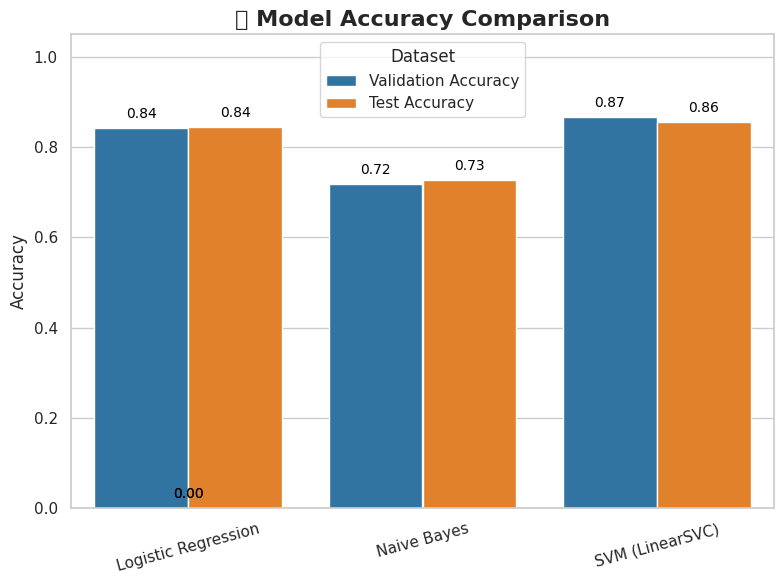

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score  # Make sure this is imported

# Sample data (replace with your actual predictions)
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM (LinearSVC)']
validation_accuracy = [accuracy_score(y_val, log_val_preds),
                       accuracy_score(y_val, nb_val_preds),
                       accuracy_score(y_val, svm_val_preds)]
test_accuracy = [accuracy_score(y_test, log_test_preds),
                 accuracy_score(y_test, nb_test_preds),
                 accuracy_score(y_test, svm_test_preds)]

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Validation Accuracy': validation_accuracy,
    'Test Accuracy': test_accuracy
})

# Melt the DataFrame for Seaborn
accuracy_df_melted = accuracy_df.melt(id_vars='Model',
                                      var_name='Dataset',
                                      value_name='Accuracy')

# Set Seaborn style
sns.set(style="whitegrid")

# Define custom colors
custom_palette = {'Validation Accuracy': '#1f77b4', 'Test Accuracy': '#ff7f0e'}

# Plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Model', y='Accuracy', hue='Dataset',
                       data=accuracy_df_melted, palette=custom_palette)

# Add value labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Chart formatting
plt.title('📊 Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)  # Slightly above 1 for label spacing
plt.xlabel('')
plt.xticks(rotation=15)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


# MODULE 5: EVALUATION AND COMPARISON

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("\n--- Logistic Regression Evaluation ---")
log_val_acc = accuracy_score(y_val, log_val_preds)
log_test_acc = accuracy_score(y_test, log_test_preds)
log_val_precision = precision_score(y_val, log_val_preds, average='weighted')
log_test_precision = precision_score(y_test, log_test_preds, average='weighted')
log_val_recall = recall_score(y_val, log_val_preds, average='weighted')
log_test_recall = recall_score(y_test, log_test_preds, average='weighted')
log_val_f1 = f1_score(y_val, log_val_preds, average='weighted')
log_test_f1 = f1_score(y_test, log_test_preds, average='weighted')

print(f"Validation Accuracy: {log_val_acc:.4f}")
print(f"Test Accuracy: {log_test_acc:.4f}")
print(f"Validation Precision: {log_val_precision:.4f}")
print(f"Test Precision: {log_test_precision:.4f}")
print(f"Validation Recall: {log_val_recall:.4f}")
print(f"Test Recall: {log_test_recall:.4f}")
print(f"Validation F1 Score: {log_val_f1:.4f}")
print(f"Test F1 Score: {log_test_f1:.4f}")


--- Logistic Regression Evaluation ---
Validation Accuracy: 0.8425
Test Accuracy: 0.8450
Validation Precision: 0.8423
Test Precision: 0.8437
Validation Recall: 0.8425
Test Recall: 0.8450
Validation F1 Score: 0.8389
Test F1 Score: 0.8398


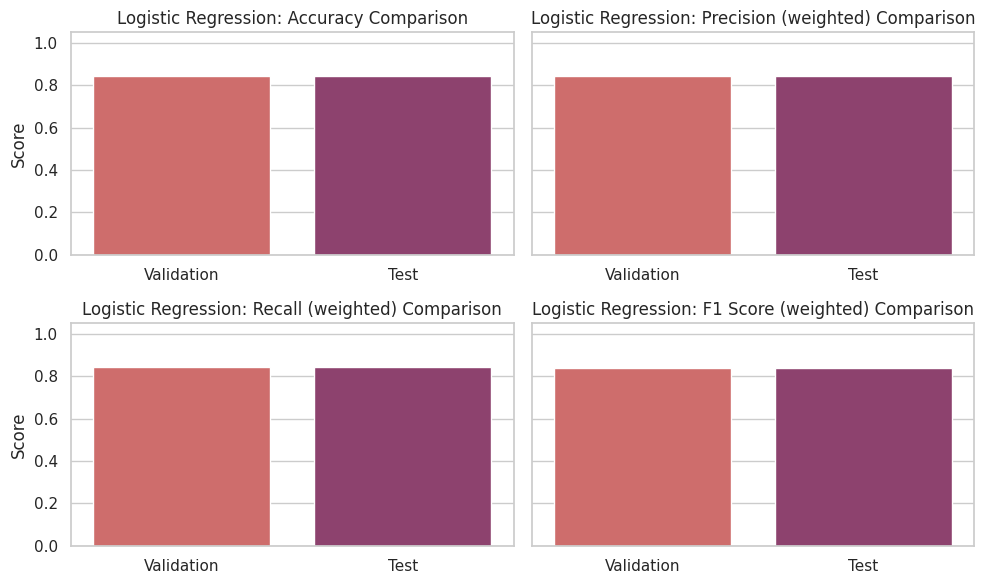

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect evaluation results for Logistic Regression
results = {
    'Model': ['Logistic Regression', 'Logistic Regression'],
    'Dataset': ['Validation', 'Test'],
    'Accuracy': [log_val_acc, log_test_acc],
    'Precision (weighted)': [log_val_precision, log_test_precision],
    'Recall (weighted)': [log_val_recall, log_test_recall],
    'F1 Score (weighted)': [log_val_f1, log_test_f1]
}

results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_df_melted = results_df.melt(id_vars=['Model', 'Dataset'],
                                    var_name='Metric',
                                    value_name='Score')

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting each metric in a separate subplot
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1 Score (weighted)']
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x='Dataset', y='Score', data=results_df_melted[results_df_melted['Metric'] == metric], palette='flare', ax=axes[i])
    axes[i].set_title(f'Logistic Regression: {metric} Comparison')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=0) # No rotation needed for only two bars
    axes[i].set_ylim(0, 1.05)
    axes[i].set_xlabel('') # Remove x-axis label as it's clear from the title

plt.tight_layout()
plt.show()

In [85]:
print("\n--- Naive Bayes Evaluation ---")
nb_val_acc = accuracy_score(y_val, nb_val_preds)
nb_test_acc = accuracy_score(y_test, nb_test_preds)
nb_val_precision = precision_score(y_val, nb_val_preds, average='weighted')
nb_test_precision = precision_score(y_test, nb_test_preds, average='weighted')
nb_val_recall = recall_score(y_val, nb_val_preds, average='weighted')
nb_test_recall = recall_score(y_test, nb_test_preds, average='weighted')
nb_val_f1 = f1_score(y_val, nb_val_preds, average='weighted')
nb_test_f1 = f1_score(y_test, nb_test_preds, average='weighted')

print(f"Validation Accuracy: {nb_val_acc:.4f}")
print(f"Test Accuracy: {nb_test_acc:.4f}")
print(f"Validation Precision: {nb_val_precision:.4f}")
print(f"Test Precision: {nb_test_precision:.4f}")
print(f"Validation Recall: {nb_val_recall:.4f}")
print(f"Test Recall: {nb_test_recall:.4f}")
print(f"Validation F1 Score: {nb_val_f1:.4f}")
print(f"Test F1 Score: {nb_test_f1:.4f}")



--- Naive Bayes Evaluation ---
Validation Accuracy: 0.7190
Test Accuracy: 0.7275
Validation Precision: 0.7402
Test Precision: 0.7512
Validation Recall: 0.7190
Test Recall: 0.7275
Validation F1 Score: 0.6729
Test F1 Score: 0.6839


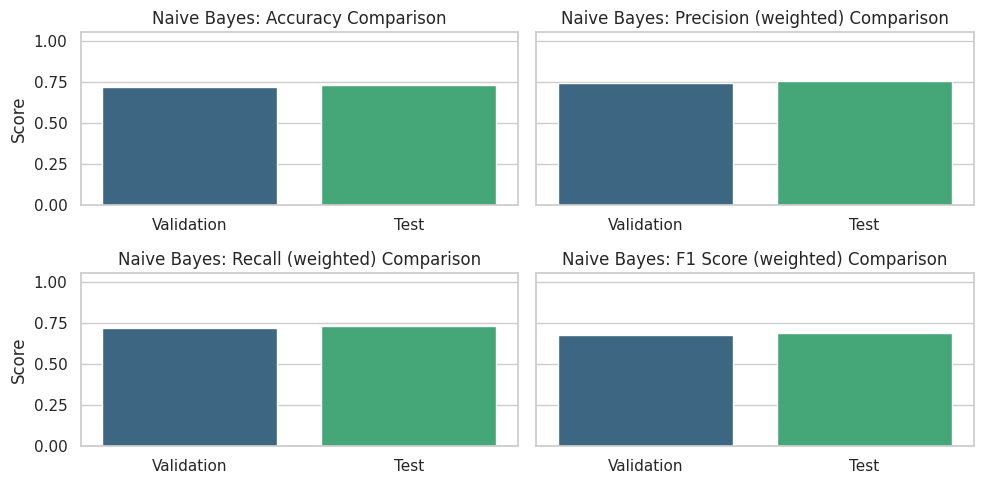

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect evaluation results for Naive Bayes
results = {
    'Model': ['Naive Bayes', 'Naive Bayes'],
    'Dataset': ['Validation', 'Test'],
    'Accuracy': [nb_val_acc, nb_test_acc],
    'Precision (weighted)': [nb_val_precision, nb_test_precision],
    'Recall (weighted)': [nb_val_recall, nb_test_recall],
    'F1 Score (weighted)': [nb_val_f1, nb_test_f1]
}

results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_df_melted = results_df.melt(id_vars=['Model', 'Dataset'],
                                    var_name='Metric',
                                    value_name='Score')

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting each metric in a separate subplot
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1 Score (weighted)']
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x='Dataset', y='Score', data=results_df_melted[results_df_melted['Metric'] == metric], palette='viridis', ax=axes[i])
    axes[i].set_title(f'Naive Bayes: {metric} Comparison')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=0) # No rotation needed for only two bars
    axes[i].set_ylim(0, 1.05)
    axes[i].set_xlabel('') # Remove x-axis label as it's clear from the title

plt.tight_layout()
plt.show()

In [87]:
print("\n--- SVM (LinearSVC) Evaluation ---")
svm_val_acc = accuracy_score(y_val, svm_val_preds)
svm_test_acc = accuracy_score(y_test, svm_test_preds)
svm_val_precision = precision_score(y_val, svm_val_preds, average='weighted')
svm_test_precision = precision_score(y_test, svm_test_preds, average='weighted')
svm_val_recall = recall_score(y_val, svm_val_preds, average='weighted')
svm_test_recall = recall_score(y_test, svm_test_preds, average='weighted')
svm_val_f1 = f1_score(y_val, svm_val_preds, average='weighted')
svm_test_f1 = f1_score(y_test, svm_test_preds, average='weighted')

print(f"Validation Accuracy: {svm_val_acc:.4f}")
print(f"Test Accuracy: {svm_test_acc:.4f}")
print(f"Validation Precision: {svm_val_precision:.4f}")
print(f"Test Precision: {svm_test_precision:.4f}")
print(f"Validation Recall: {svm_val_recall:.4f}")
print(f"Test Recall: {svm_test_recall:.4f}")
print(f"Validation F1 Score: {svm_val_f1:.4f}")
print(f"Test F1 Score: {svm_test_f1:.4f}")


--- SVM (LinearSVC) Evaluation ---
Validation Accuracy: 0.8665
Test Accuracy: 0.8565
Validation Precision: 0.8658
Test Precision: 0.8553
Validation Recall: 0.8665
Test Recall: 0.8565
Validation F1 Score: 0.8656
Test F1 Score: 0.8554


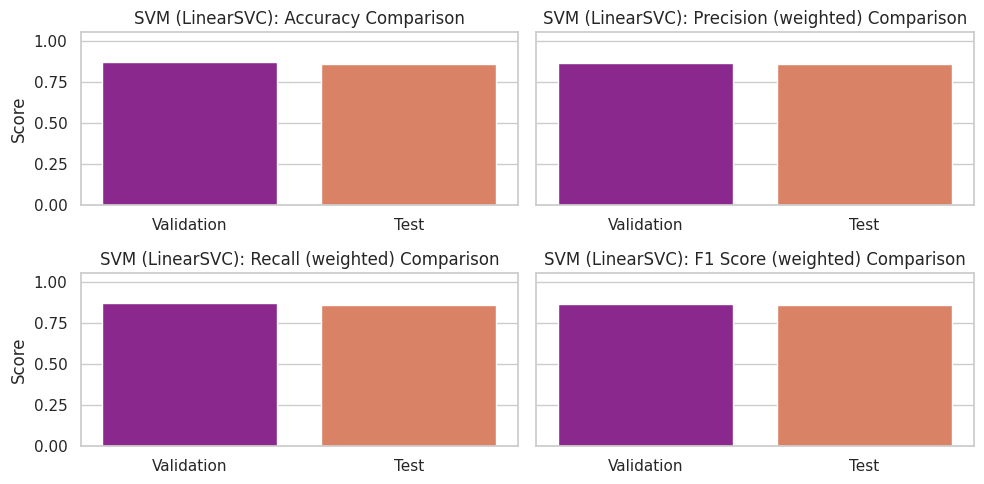

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect evaluation results for SVM model
results = {
    'Model': ['SVM (LinearSVC)', 'SVM (LinearSVC)'],
    'Dataset': ['Validation', 'Test'],
    'Accuracy': [svm_val_acc, svm_test_acc],
    'Precision (weighted)': [svm_val_precision, svm_test_precision],
    'Recall (weighted)': [svm_val_recall, svm_test_recall],
    'F1 Score (weighted)': [svm_val_f1, svm_test_f1]
}

results_df = pd.DataFrame(results)

# Melt the DataFrame for easier plotting
results_df_melted = results_df.melt(id_vars=['Model', 'Dataset'],
                                    var_name='Metric',
                                    value_name='Score')

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting each metric in a separate subplot with a different color palette
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1 Score (weighted)']
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharey=True)
axes = axes.flatten()

# Define a custom color palette
svm_palette = sns.color_palette("plasma", 2) # Using 'plasma' palette with 2 colors for validation/test

for i, metric in enumerate(metrics):
    sns.barplot(x='Dataset', y='Score', data=results_df_melted[results_df_melted['Metric'] == metric], palette=svm_palette, ax=axes[i])
    axes[i].set_title(f'SVM (LinearSVC): {metric} Comparison')
    axes[i].set_ylabel('Score')
    axes[i].tick_params(axis='x', rotation=0) # No rotation needed for only two bars
    axes[i].set_ylim(0, 1.05)
    axes[i].set_xlabel('') # Remove x-axis label as it's clear from the title

plt.tight_layout()
plt.show()

Comparing all the models **(logistic regression,naive bayes and SVM )** through Classification Report

In [89]:
from sklearn.metrics import classification_report

print("\n--- Logistic Regression Classification Report (Test Set) ---")
print(classification_report(y_test, log_test_preds, target_names=label_encoder.classes_))

print("\n--- Naive Bayes Classification Report (Test Set) ---")
print(classification_report(y_test, nb_test_preds, target_names=label_encoder.classes_))

print("\n--- SVM (LinearSVC) Classification Report (Test Set) ---")
print(classification_report(y_test, svm_test_preds, target_names=label_encoder.classes_))


--- Logistic Regression Classification Report (Test Set) ---
              precision    recall  f1-score   support

       anger       0.85      0.79      0.82       275
        fear       0.85      0.79      0.82       224
         joy       0.83      0.94      0.88       695
        love       0.77      0.54      0.63       159
     sadness       0.87      0.90      0.89       581
    surprise       0.85      0.50      0.63        66

    accuracy                           0.84      2000
   macro avg       0.84      0.74      0.78      2000
weighted avg       0.84      0.84      0.84      2000


--- Naive Bayes Classification Report (Test Set) ---
              precision    recall  f1-score   support

       anger       0.92      0.48      0.63       275
        fear       0.90      0.42      0.58       224
         joy       0.69      0.98      0.81       695
        love       1.00      0.16      0.27       159
     sadness       0.71      0.90      0.79       581
    surprise    

**Importing Required libraries for visualize the results and compare the models wisely.**

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

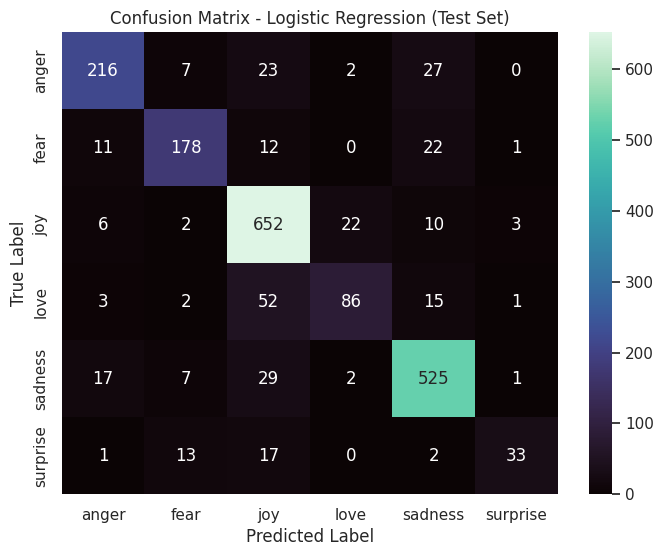

In [91]:
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, log_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='mako', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

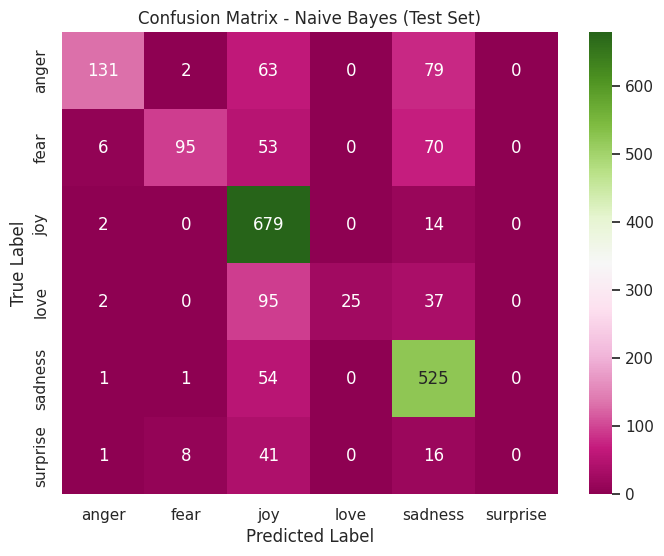

In [92]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='PiYG', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Naive Bayes (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

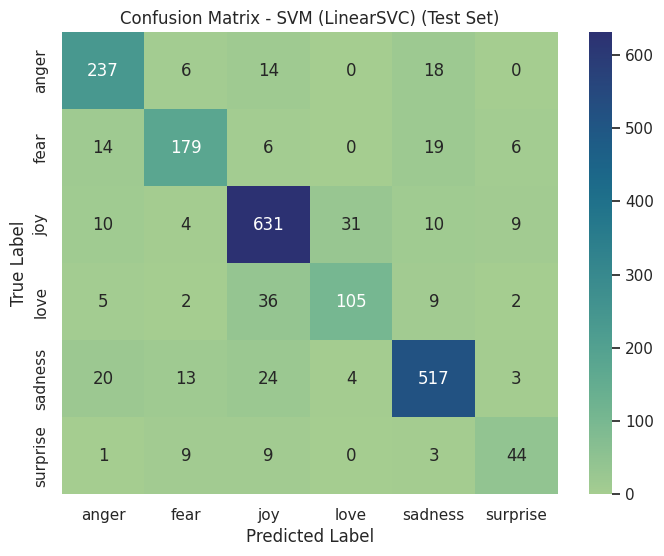

In [93]:
# Confusion Matrix for SVM (LinearSVC)
cm_svm = confusion_matrix(y_test, svm_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='crest', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM (LinearSVC) (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# MODULE 6: TESTING

Model's performance test on Test Dataset and Unseen Data

In [95]:
# Logistic Regression Test Predictions
log_test_preds = log_reg.predict(X_test)
print("\n🔹 Logistic Regression - Test Set Predictions \n")
for i in range(5):
    print(f"Tweet: {test_texts[i]}")
    print(f"Actual: {test_labels[i]} | Predicted: {label_encoder.inverse_transform([log_test_preds[i]])[0]}")
    print()

# Naive Bayes Test Predictions
nb_test_preds = nb.predict(X_test)
print("\n🔹 Naive Bayes - Test Set Predictions")
for i in range(5):
    print(f"Tweet: {test_texts[i]}")
    print(f"Actual: {test_labels[i]} | Predicted: {label_encoder.inverse_transform([nb_test_preds[i]])[0]}")
    print()

# SVM Test Predictions
svm_test_preds = svm.predict(X_test)
print("\n🔹 SVM - Test Set Predictions")
for i in range(5):
    print(f"Tweet: {test_texts[i]}")
    print(f"Actual: {test_labels[i]} | Predicted: {label_encoder.inverse_transform([svm_test_preds[i]])[0]}")
    print()


🔹 Logistic Regression - Test Set Predictions 

Tweet: im feeling rather rotten so im not very ambitious right now
Actual: sadness | Predicted: sadness

Tweet: im updating my blog because i feel shitty
Actual: sadness | Predicted: sadness

Tweet: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Actual: sadness | Predicted: sadness

Tweet: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
Actual: joy | Predicted: joy

Tweet: i was feeling a little vain when i did this one
Actual: sadness | Predicted: sadness


🔹 Naive Bayes - Test Set Predictions
Tweet: im feeling rather rotten so im not very ambitious right now
Actual: sadness | Predicted: sadness

Tweet: im updating my blog because i feel shitty
Actual: sadness | Predicted: sadness

Tweet: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Actual: sadness | Predicted: sadness



In [96]:
# Provide any new tweet samples for testing
unseen_tweets = [
    "I’m feeling so low and empty today.",
    "This surprise party made me feel so loved!",
    "I can’t stop crying since I lost my pet.",
    "Just got my dream job, I’m on cloud nine!",
    "Everything feels bad now, nothing's good"
]

# Preprocess unseen tweets
unseen_cleaned = [preprocess_text(t) for t in unseen_tweets]

# Vectorize using the same trained TF-IDF vectorizer
unseen_vectors = vectorizer.transform(unseen_cleaned)

# Predict with each model and show results
print("\n🔍 Predictions on Unseen Tweets\n")

models = {
    "🔹 LOGISTIC REGRESSION ": log_reg,
    "🔹 NAIVE BAYES ": nb,
    "🔹 SVM (LinearSVC) ": svm
}

for name, model in models.items():
    print(f"\n --- {name} --- \n")
    preds = model.predict(unseen_vectors)
    decoded_preds = label_encoder.inverse_transform(preds)

    for i, tweet in enumerate(unseen_tweets):
        print(f"Tweet: {tweet}")
        print(f"Predicted Emotion: {decoded_preds[i]}\n")


🔍 Predictions on Unseen Tweets


 --- 🔹 LOGISTIC REGRESSION  --- 

Tweet: I’m feeling so low and empty today.
Predicted Emotion: sadness

Tweet: This surprise party made me feel so loved!
Predicted Emotion: surprise

Tweet: I can’t stop crying since I lost my pet.
Predicted Emotion: sadness

Tweet: Just got my dream job, I’m on cloud nine!
Predicted Emotion: joy

Tweet: Everything feels bad now, nothing's good
Predicted Emotion: sadness


 --- 🔹 NAIVE BAYES  --- 

Tweet: I’m feeling so low and empty today.
Predicted Emotion: sadness

Tweet: This surprise party made me feel so loved!
Predicted Emotion: joy

Tweet: I can’t stop crying since I lost my pet.
Predicted Emotion: sadness

Tweet: Just got my dream job, I’m on cloud nine!
Predicted Emotion: joy

Tweet: Everything feels bad now, nothing's good
Predicted Emotion: sadness


 --- 🔹 SVM (LinearSVC)  --- 

Tweet: I’m feeling so low and empty today.
Predicted Emotion: sadness

Tweet: This surprise party made me feel so loved!
Predicte

# MODULE 7: DEPLOYEMENT

Model Is Deployed Through *GRADIO*

In [97]:
import gradio as gr

def predict_all_models(text):
    cleaned = preprocess_text(text)
    vector = vectorizer.transform([cleaned])

    log_pred = label_encoder.inverse_transform(log_reg.predict(vector))[0]
    nb_pred = label_encoder.inverse_transform(nb.predict(vector))[0]
    svm_pred = label_encoder.inverse_transform(svm.predict(vector))[0]

    return log_pred, nb_pred, svm_pred

gr.Interface(
    fn=predict_all_models,
    inputs=gr.Textbox(lines=3, placeholder="Enter a tweet or sentence"),
    outputs=[
        gr.Textbox(label="Logistic Regression"),
        gr.Textbox(label="Naive Bayes"),
        gr.Textbox(label="SVM (LinearSVC)")
    ],
    title="Multiclass Emotion Classifier",
    description="Enter a sentence and get predictions from 3 models."
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://60f59e77dd2c0909e6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
